<a href="https://colab.research.google.com/github/seeedata/LG-Aimers/blob/main/Finding%20Moving%20Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#train 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/data/train.csv', encoding='cp949'); df

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
df.drop(['제품', '대분류', '중분류', '소분류', '브랜드'], axis=1, inplace=True)
df= df.melt('ID'); df

,ID,variable,value
0,0,2022-01-01,0
1,1,2022-01-01,0
2,2,2022-01-01,0
3,3,2022-01-01,0
4,4,2022-01-01,0
...,...,...,...
7293505,15885,2023-04-04,0
7293506,15886,2023-04-04,3
7293507,15887,2023-04-04,0
7293508,15888,2023-04-04,2


#20, 40, 60일 이동평균 구하기

In [ ]:
def MA(df):
    dfs = {}  #빈 딕셔너리 생성

    short_period = 20  #짧은 기간의 이동평균
    medium_period = 40  #중간 기간의 이동평균
    long_period = 60  #긴 기간의 이동평균

    for i in range(15890):  #각 id별로 데이터프레임 생성해서 이동평균 적용할 예정
        dfs[f'df_id_{i}'] = df[df['ID'] == i]  #딕셔너리에 데이터프레임 저장

        dfs[f'df_id_{i}'].reset_index(drop=True, inplace=True)  #인덱스 재정렬

        ## 이동평균 구해서 열 추가
        dfs[f'df_id_{i}']['short_MA'] = dfs[f'df_id_{i}']['value'].rolling(window=short_period).mean()
        dfs[f'df_id_{i}']['medium_MA'] = dfs[f'df_id_{i}']['value'].rolling(window=medium_period).mean()
        dfs[f'df_id_{i}']['long_MA'] = dfs[f'df_id_{i}']['value'].rolling(window=long_period).mean()

        ## 그래프 그리기
        plt.figure(figsize=(20,6))

        plt.plot(dfs[f'df_id_{i}']['value'], label='original')
        plt.plot(dfs[f'df_id_{i}']['short_MA'], label=f'{short_period}MA')
        plt.plot(dfs[f'df_id_{i}']['medium_MA'], label=f'{medium_period}MA')
        plt.plot(dfs[f'df_id_{i}']['long_MA'], label=f'{long_period}MA')

        plt.title(f'Sales of {i} with Moving Average')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.grid(True)
        plt.legend()
        plt.show()

#ID 224로 적절한 기간 구하기

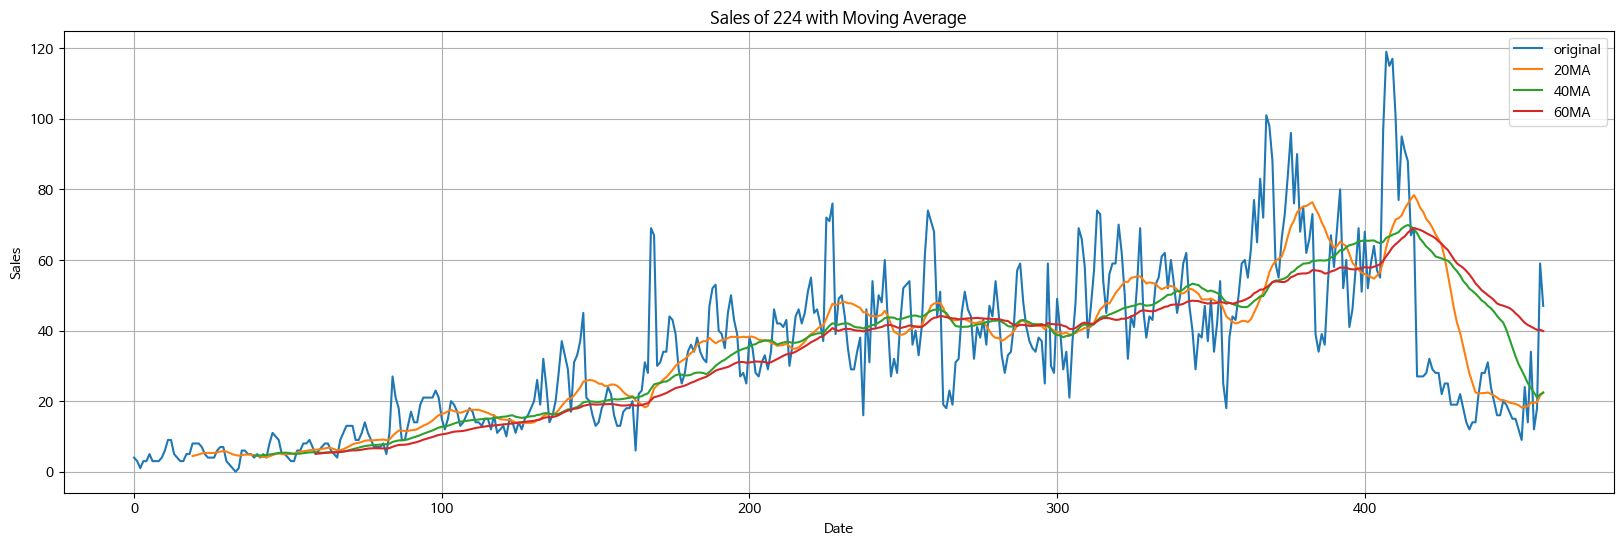

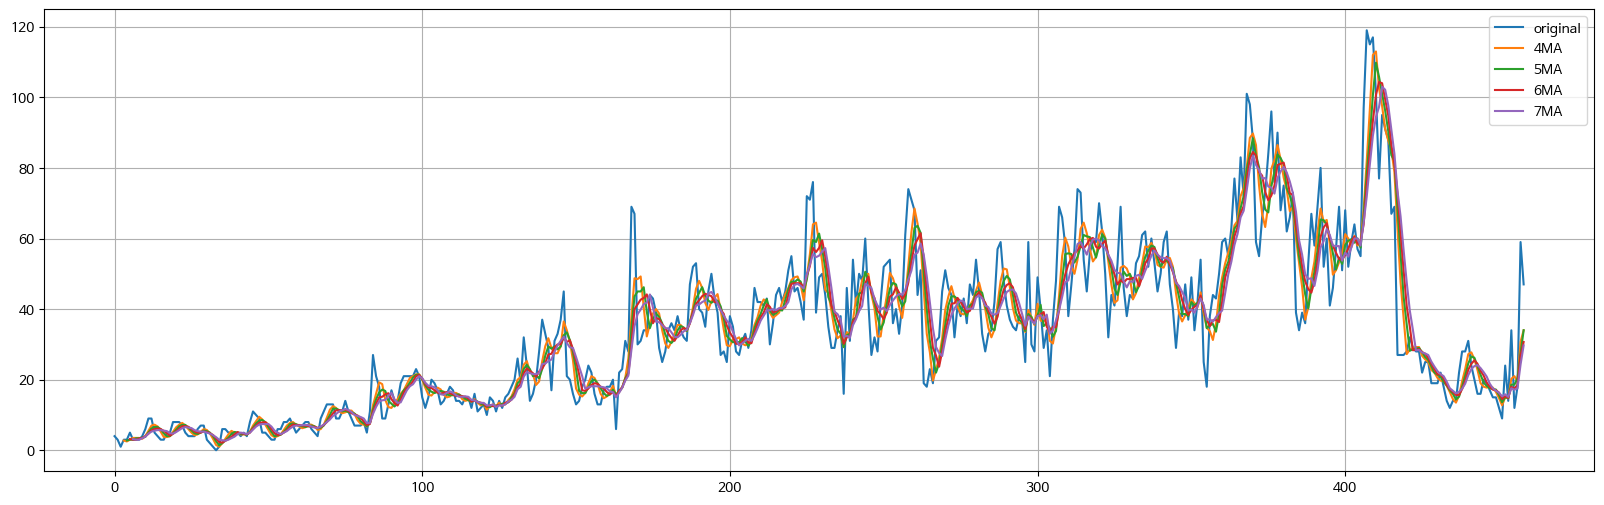

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(4, 8):  #4~7일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

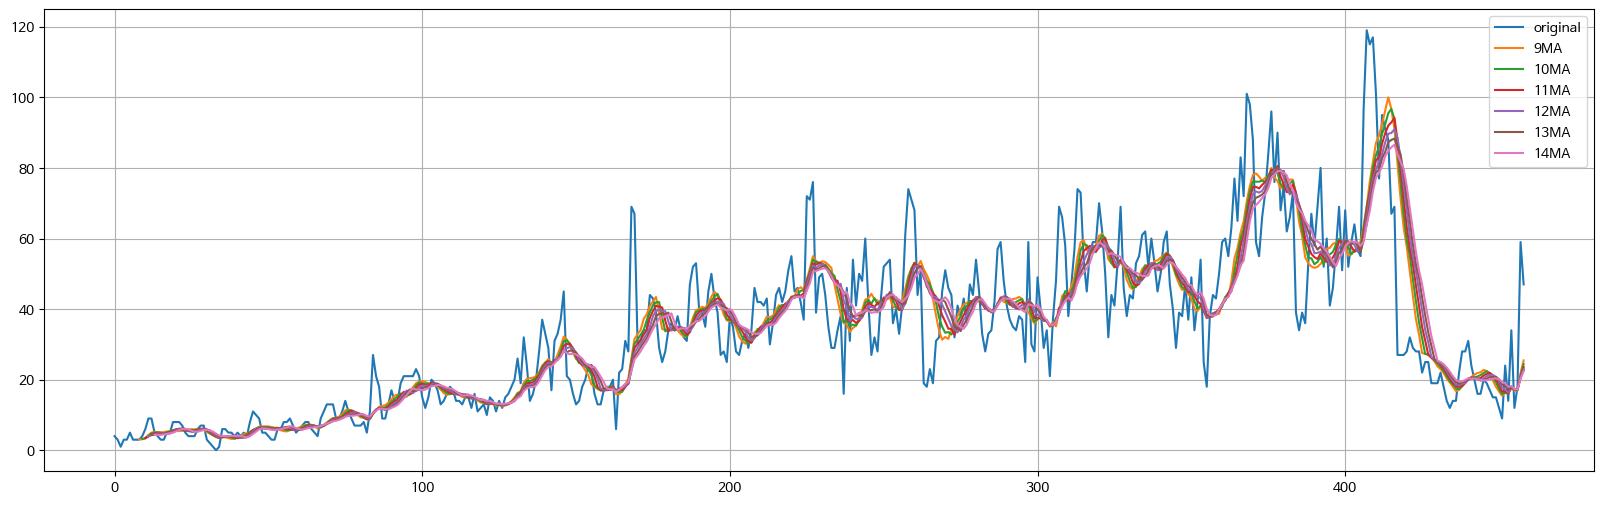

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(9, 15):  #9~14일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

9~14일은 평균 근처에만 머무르는 느낌이다.

4~7일 중에 하나를 고르자.

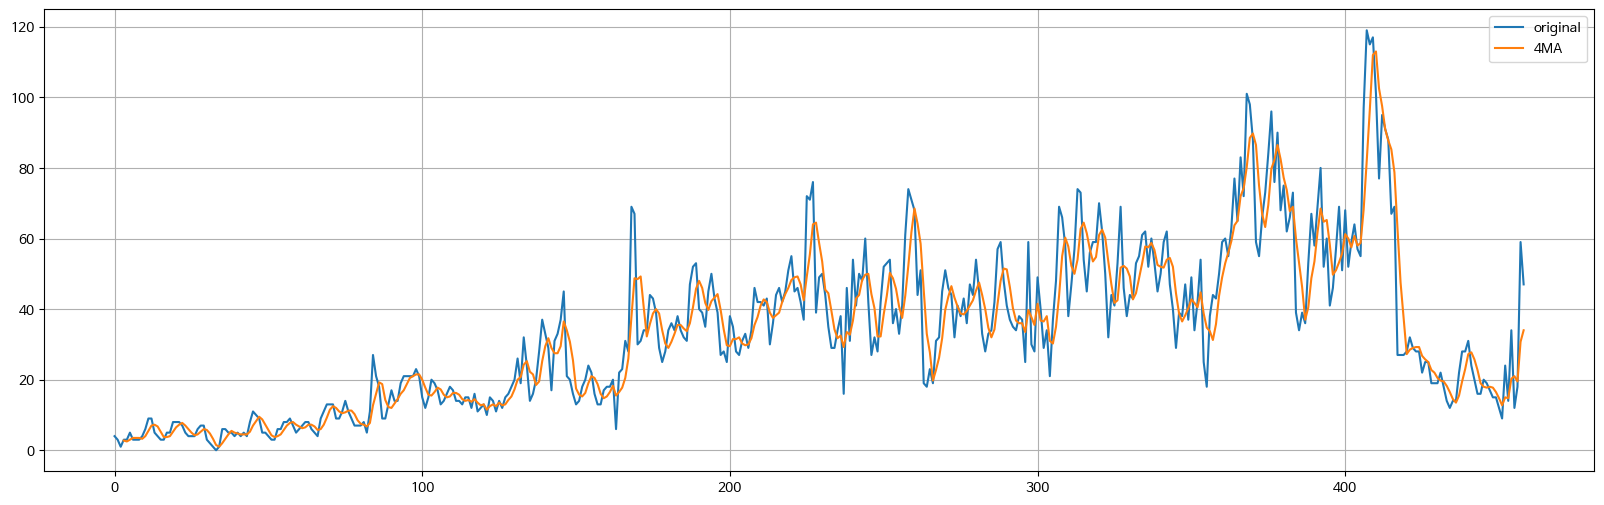

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(4,5):  #4일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

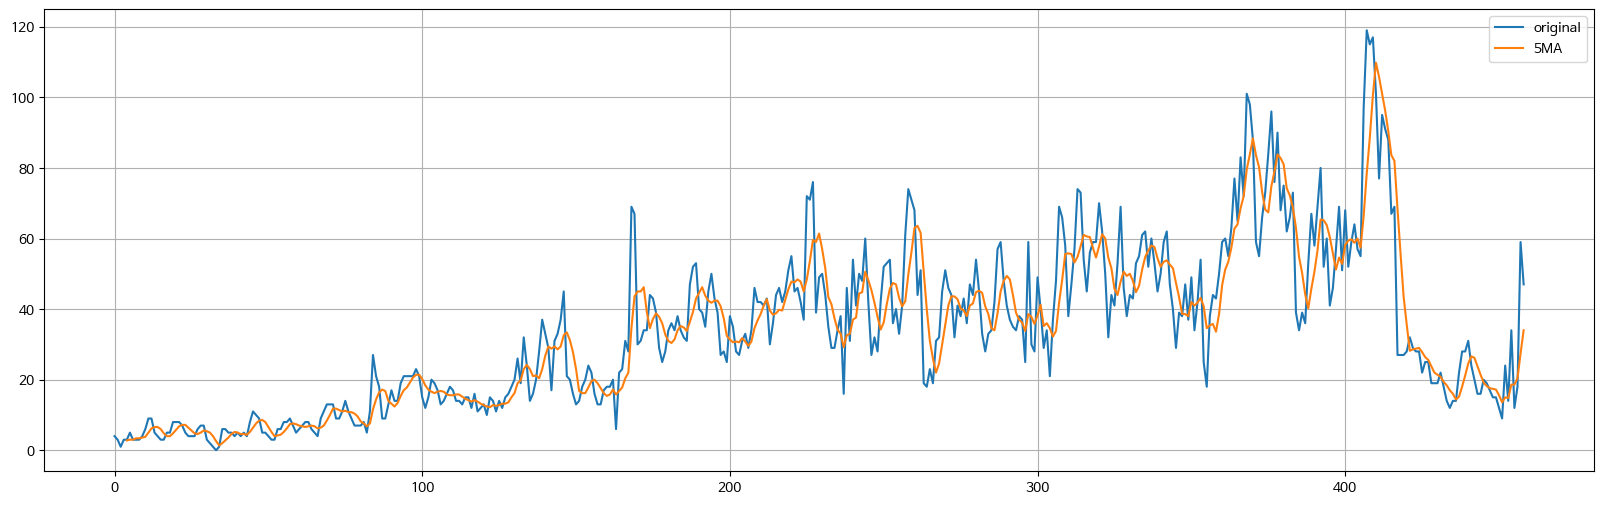

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(5,6):  #5일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

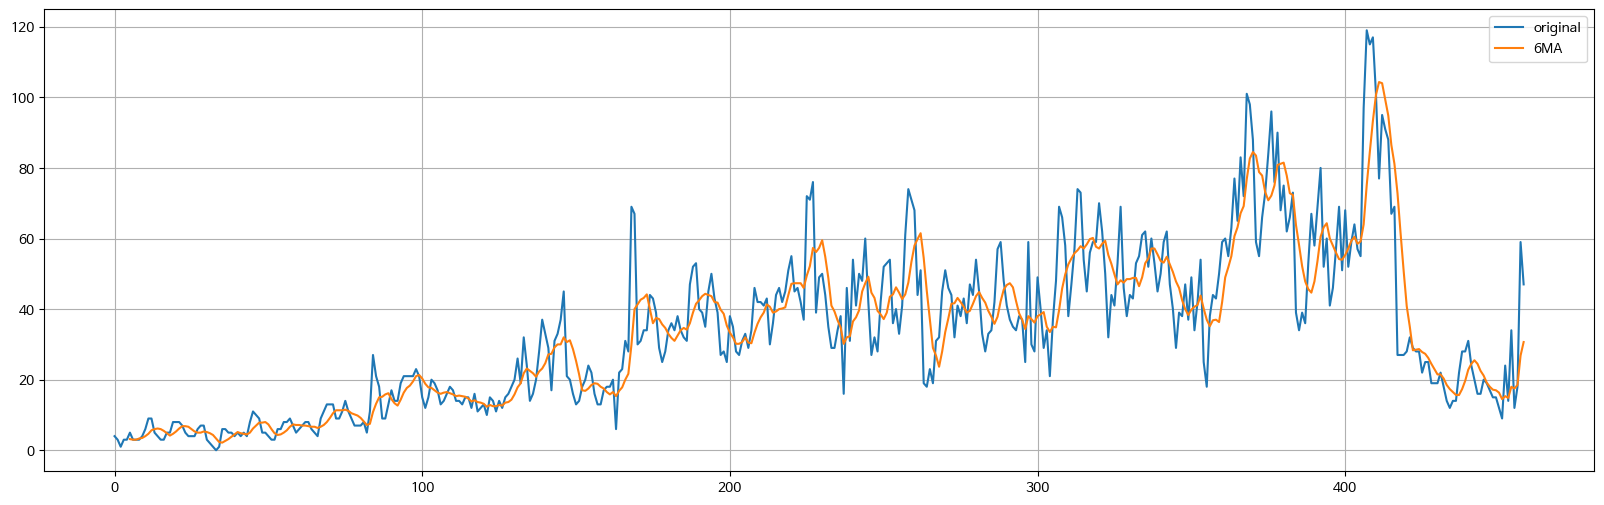

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(6,7):  #6일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

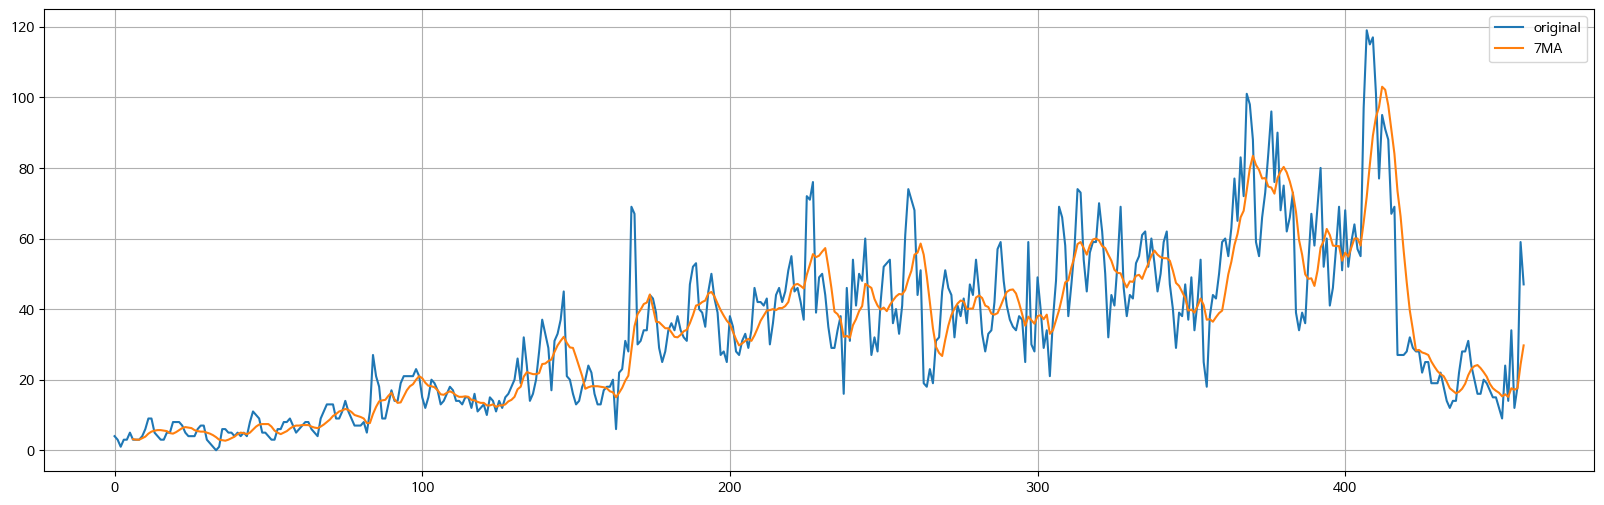

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(7,8):  #7일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

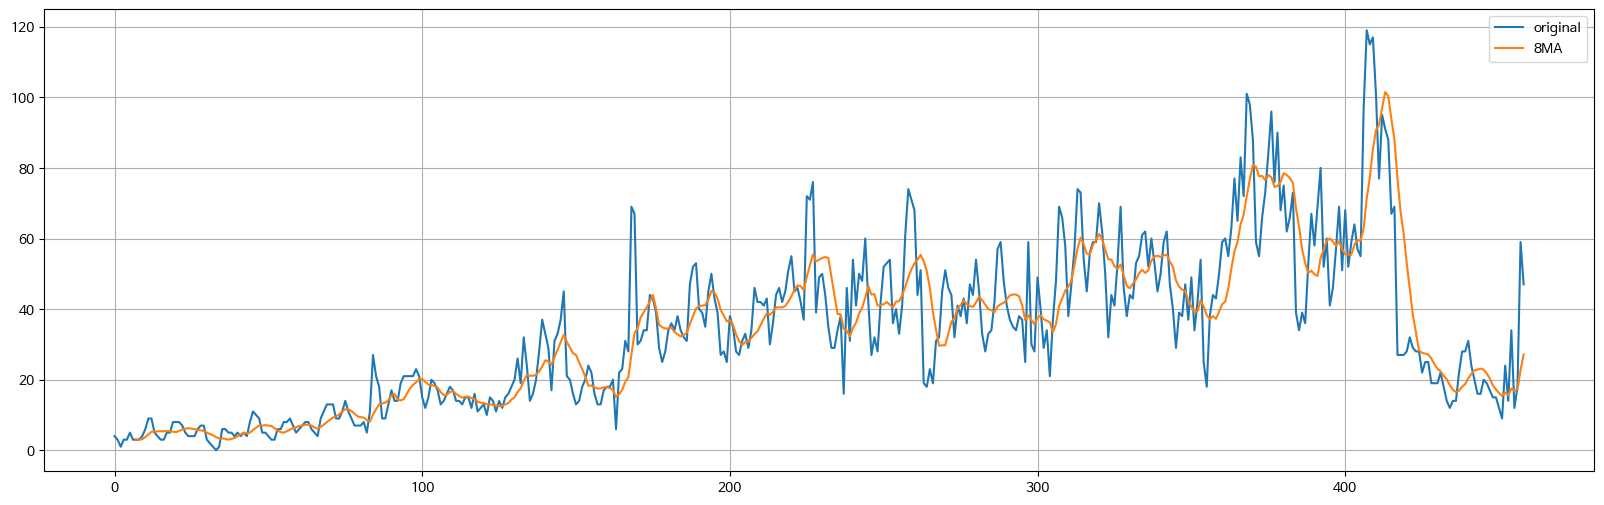

In [ ]:
df_p = df[df['ID'] == 224]
df_p.reset_index(drop=True, inplace=True)
for period in range(8,9):  #8일로 계산
    df_p[f'{period}MA'] = df_p['value'].rolling(window=period).mean()

columns = df_p.columns[3:]

plt.figure(figsize=(20,6))
plt.plot(df_p['value'], label='original')
for p in columns:
    plt.plot(df_p[p], label=f'{p}')
plt.legend()
plt.grid(True)
plt.show()

단기적인 한 달 간의 판매량을 예측하는 것이므로, 추세를 너무 단순화하는 것은 적합하지 않다고 판단했다. 추세 단순화는 장기적인 예측에 적절

기간을 5일로 하자!

#5일 이동평균 구하기

In [ ]:
def MA5(df):  #이동평균 구해서 그래프 그리는 함수
    dfs = {}  #빈 딕셔너리 생성

    period = 5

    for i in range(15890):  #각 id별로 데이터프레임 생성해서 이동평균 적용할 예정
        dfs[f'df_id_{i}'] = df[df['ID'] == i]  #딕셔너리에 데이터프레임 저장

        dfs[f'df_id_{i}'].reset_index(drop=True, inplace=True)  #인덱스 재정렬

        ## 이동평균 구해서 열 추가
        dfs[f'df_id_{i}']['MA'] = dfs[f'df_id_{i}']['value'].rolling(window=period).mean()

        ## 그래프 그리기
        plt.figure(figsize=(20,6))

        plt.plot(dfs[f'df_id_{i}']['value'], label='original')
        plt.plot(dfs[f'df_id_{i}']['MA'], label=f'{period}MA')

        plt.title(f'Sales of ID {i} with Moving Average')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.grid(True)
        plt.legend()
        plt.show()

In [ ]:
def MA5_df(df):  #이동평균 구해서 데이터프레임 하나로 합치는 함수
    dfs = {}  #빈 딕셔너리 생성

    period = 5

    new_df = pd.DataFrame()

    for i in range(15890):  #각 id별로 데이터프레임 생성해서 이동평균 적용할 예정
        dfs[f'df_id_{i}'] = df[df['ID'] == i]  #딕셔너리에 데이터프레임 저장

        dfs[f'df_id_{i}'].reset_index(drop=True, inplace=True)  #인덱스 재정렬

        #이동평균 구해서 열 추가
        dfs[f'df_id_{i}']['MA'] = dfs[f'df_id_{i}']['value'].rolling(window=period).mean()

        new_df = pd.concat([new_df, dfs[f'df_id_{i}']])
        print(i)

    return new_df

In [ ]:
new_df = MA5_df(df)

In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/이동평균데이터_임시저장.csv')

#train 데이터프레임과 동일한 형태로 바꾸기

In [ ]:
pivot = new_df.pivot(index='ID', columns='variable', values='MA')
pivot

variable,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.8,1.2,1.2,1.2,1.4,0.8
2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15886,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.6,1.0,1.8,2.0,1.6,2.2
15887,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot.reset_index(inplace=True); pivot

variable,ID,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.8,1.2,1.2,1.2,1.4,0.8
2,2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15886,15886,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.6,1.0,1.8,2.0,1.6,2.2
15887,15887,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15888,15888,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4


In [ ]:
pivot.to_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/이동평균데이터.csv')